## Day 25 Lecture 2 Assignment

In this assignment, we will extend a previous binary model to a multinomial case with three classes. We will use the FIFA soccer ratings dataset loaded below and analyze the model generated for this dataset.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups_vectorized
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
def remove_correlated_features(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
                if colname in dataset.columns:
                    print(f'Deleted {colname} from dataset.')
                    del dataset[colname]

    return dataset

In [ ]:
soccer_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/fifa_ratings.csv')

In [ ]:
soccer_data.head()

,ID,Name,Overall,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,158023,L. Messi,94,84,95,70,90,86,97,93,94,87,96,91,86,91,95,95,85,68,72,59,94,48,22,94,94,75,96,33,28,26
1,20801,Cristiano Ronaldo,94,84,94,89,81,87,88,81,76,77,94,89,91,87,96,70,95,95,88,79,93,63,29,95,82,85,95,28,31,23
2,190871,Neymar Jr,92,79,87,62,84,84,96,88,87,78,95,94,90,96,94,84,80,61,81,49,82,56,36,89,87,81,94,27,24,33
3,192985,K. De Bruyne,91,93,82,55,92,82,86,85,83,91,91,78,76,79,91,77,91,63,90,75,91,76,61,87,94,79,88,68,58,51
4,183277,E. Hazard,91,81,84,61,89,80,95,83,79,83,94,94,88,95,90,94,82,56,83,66,80,54,41,87,89,86,91,34,27,22


Our response for our logistic regression model is going to be a new column, "RankingTier", that contains three categories:

- High: Overall score > 75
- Middle: Overall score between 65 and 75
- Low: Overall score < 65

In [ ]:
# answer goes here
soccer_data['RankingTier'] = soccer_data['Overall'].apply(lambda x: "High" if (x > 75) else ("Low" if (x < 65) else "Middle"))

In [ ]:
soccer_data.head()

,ID,Name,Overall,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,RankingTier
0,158023,L. Messi,94,84,95,70,90,86,97,93,94,87,96,91,86,91,95,95,85,68,72,59,94,48,22,94,94,75,96,33,28,26,High
1,20801,Cristiano Ronaldo,94,84,94,89,81,87,88,81,76,77,94,89,91,87,96,70,95,95,88,79,93,63,29,95,82,85,95,28,31,23,High
2,190871,Neymar Jr,92,79,87,62,84,84,96,88,87,78,95,94,90,96,94,84,80,61,81,49,82,56,36,89,87,81,94,27,24,33,High
3,192985,K. De Bruyne,91,93,82,55,92,82,86,85,83,91,91,78,76,79,91,77,91,63,90,75,91,76,61,87,94,79,88,68,58,51,High
4,183277,E. Hazard,91,81,84,61,89,80,95,83,79,83,94,94,88,95,90,94,82,56,83,66,80,54,41,87,89,86,91,34,27,22,High


The next few steps until model training are the same as before: identify and remove highly correlated features, and split the data into a training set (80%) and a test set (20%).

In [ ]:
# answer goes here
soccer_data.corr().head()




,ID,Overall,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
ID,1.000000,-0.426009,-0.277281,-0.169946,-0.288233,-0.315288,-0.277298,-0.149494,-0.307825,-0.327434,-0.315755,-0.285933,0.173195,0.173248,-0.036440,-0.415952,0.035525,-0.327636,-0.176311,-0.158896,-0.285786,-0.289826,-0.354708,-0.238507,-0.206827,-0.289062,-0.261517,-0.470480,-0.200288,-0.168401,-0.138797
Overall,-0.426009,1.000000,0.496603,0.373079,0.466908,0.722720,0.452090,0.516363,0.503054,0.455875,0.585104,0.717933,0.150825,0.170155,0.244344,0.847739,0.059425,0.562960,0.228271,0.461417,0.341067,0.502109,0.452916,0.333275,0.438692,0.524361,0.391124,0.801749,0.305698,0.264082,0.224365
Crossing,-0.277281,0.496603,1.000000,0.413404,-0.134959,0.632386,0.472485,0.712261,0.714762,0.618580,0.592781,0.682796,0.439799,0.393403,0.547590,0.461861,0.435751,0.457531,-0.027529,0.351862,-0.177255,0.548462,0.105539,0.125985,0.585624,0.643948,0.371606,0.469666,0.086971,0.085429,0.078963
Finishing,-0.169946,0.373079,0.413404,1.000000,0.002099,0.398895,0.814663,0.706635,0.614189,0.537508,0.218965,0.645849,0.373630,0.349087,0.480792,0.349146,0.311487,0.703408,-0.057519,0.119415,-0.125550,0.803036,-0.201407,-0.491733,0.818964,0.655283,0.744835,0.412177,-0.503042,-0.558565,-0.585841
HeadingAccuracy,-0.288233,0.466908,-0.134959,0.002099,1.000000,0.131909,0.062357,-0.134535,-0.091652,-0.076517,0.057267,0.069890,-0.335712,-0.238734,-0.351398,0.405671,-0.467826,0.189628,0.357951,0.161594,0.641662,0.029784,0.458631,0.286880,-0.024105,-0.079291,0.108405,0.344770,0.274280,0.257420,0.234933


In [ ]:
soccer = soccer_data.drop(columns=['ID'])

In [ ]:
soccer_X = soccer.drop(["Overall", "RankingTier", "Name"], axis=1)
soccer_Y = soccer["RankingTier"]
X_train, X_test, y_train, y_test = train_test_split(soccer_X, soccer_Y, test_size=0.2, random_state=54)
X_train_const = sm.add_constant(X_train)

In [ ]:
sm_model = sm.MNLogit(y_train, X_train_const).fit()
print(sm_model.summary())
print(sm_model.summary2())

Optimization terminated successfully.
         Current function value: 0.338659
         Iterations 11
                          MNLogit Regression Results                          
Dep. Variable:            RankingTier   No. Observations:                12897
Model:                        MNLogit   Df Residuals:                    12837
Method:                           MLE   Df Model:                           58
Date:                Fri, 16 Oct 2020   Pseudo R-squ.:                  0.6302
Time:                        19:41:57   Log-Likelihood:                -4367.7
converged:                       True   LL-Null:                       -11812.
Covariance Type:            nonrobust   LLR p-value:                     0.000
   RankingTier=Low       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 99.3163      2.243     44.280      0.000      94.920     103.712
Cros

Fit a multinomial logistic regression model using the statsmodels package and print out the coefficient summary. What is the "reference" tier chosen by the model? How do we interpret the coefficients - for example, how does the intepretation of the "Reactions" coefficient for RankingTier=Low differ from the "Reactions" coefficient for RankingTier=Middle?

In [ ]:
# answer goes here
ng_multinomial_lr_clf = LogisticRegression(solver='sag', multi_class='multinomial') 
ranking = ng_multinomial_lr_clf.fit(X_train, y_train)




/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [ ]:
ng_multinomial_proba = ng_multinomial_lr_clf.predict_proba(X_test)

To evaluate test error using cross-validation, we will switch back to scikit-learn. Estimate the test error of this multinomial logistic regression model using 10-fold CV.

Note: scikit-learn's LogisticRegression() function can handle both binary and multinomial regression, and it is automatically able to determine which is appropriate based on the y_train array that is passed. You should be able to reuse previous code with minimal changes required.

In [ ]:
# answer goes here
clf = LogisticRegression(solver='lbfgs') 
cv_scores = cross_val_score(clf, X_train, y_train, cv = 5)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
print('Accuracy scores for the 10 folds: ', cv_scores)
print('Mean cross validatiion score: {:.3f}'.format(np.mean(cv_scores)))

Accuracy scores for the 10 folds:  [0.70581395 0.70620155 0.71927104 0.69406747 0.72120977]
Mean cross validatiion score: 0.709


As we did in the previous exercise, train a multinomial logistic regression on the training data, make predictions on the 20% holdout test data, then:

- Determine the precision, recall, and F1-score of our model using a cutoff/threshold of 0.5 (hint: scikit-learn's *classification_report* function may be helpful)
- Plot or otherwise generate a confusion matrix
- Plot the ROC curve for our logistic regression model

Comment on the performance of the model.

In [ ]:
# answer goes here
logit = LogisticRegression(max_iter=1000)
logit.fit(X_train, y_train)

train_predicted_y = logit.predict(X_train)
print(classification_report(y_train, train_predicted_y))


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

        High       0.88      0.56      0.68      1124
         Low       0.85      0.85      0.85      4904
      Middle       0.83      0.88      0.85      6869

    accuracy                           0.84     12897
   macro avg       0.85      0.76      0.79     12897
weighted avg       0.84      0.84      0.84     12897



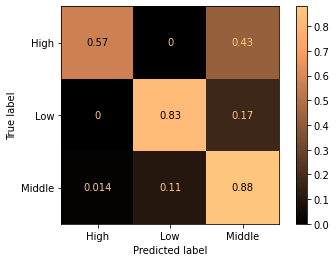

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
cm = confusion_matrix(y_train, train_predicted_y, labels=['Low', 'Middle', 'High'])
plot_confusion_matrix(logit, X_test, y_test, cmap='copper', normalize='true')
plt.show()

In [ ]:
Y_bin = pd.get_dummies(y_test)
Y_pred_prob = logit.predict_proba(X_test)

In [ ]:
Y_bin.iloc[0]

High      0
Low       1
Middle    0
Name: 12237, dtype: uint8

In [ ]:
x, y, _ = roc_curve(Y_bin.iloc[:, 0], Y_pred_prob[:,0])
roc_auc = auc(x, y)

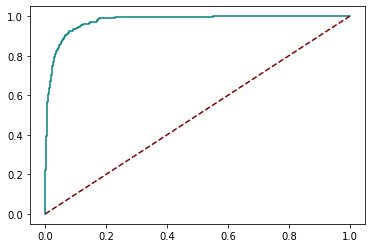

In [ ]:
plt.plot(x, y, color='teal')
plt.plot([0, 1], [0, 1], color='maroon', linestyle='--')
plt.show()